In [34]:
!pip3 install KoNLPy

    100% |████████████████████████████████| 19.4MB 1.8MB/s 
    100% |████████████████████████████████| 174kB 27.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/0e/2b/e8/c0b818ac4b3d35104d35e48cdc7afe27fc06ea277feed2831a
Successfully built JPype1


In [0]:
from konlpy.tag import *

In [36]:
twitter = Twitter()
komoran = Komoran()
kkma = Kkma()

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [65]:
!pip install wikipedia-api




  Stored in directory: /root/.cache/pip/wheels/4c/30/9c/eea5366306c9a7bfb1094c5b42075b2191253858fbf1482621
Successfully built wikipedia-api


In [0]:
import wikipediaapi

In [71]:
wiki=wikipediaapi.Wikipedia('ko')


page_cats = wiki.page('노르웨이 숲고양이') 
print("Page - Exists: %s" % page_cats.exists()) 


Page - Exists: True


In [72]:
print(page_cats.title) 

노르웨이 숲고양이


In [0]:
text=page_cats.text

In [0]:
def make_corpus(text):
    corpus = []
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s)])
    return corpus
  
  

def make_corpus_rm_stopwords(text):
    corpus = []
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s) if p[1] != "Josa"])
    return corpus


In [0]:
corpus = make_corpus(text)

In [0]:
from gensim.models import Word2Vec, fasttext
# input format : [["my", "name", "is", "jamie"], ["jamie", "is", "cute"]]
# size : 임베딩 차원
# window : 윈도우 사이즈
# min_count : 고려할 단어의 최소 빈도 기준
# workers : cpu core 수
# iter : 반복 학습 횟수(epoch)
# sg : 0 -> CBOW, 1 -> Skip-Gram
# CBOW_model - Word2Vec(corpus, size=2, window=2, min_count=2, workers=1, iter=1000, sg=1)

In [0]:
Skip_Gram_model = Word2Vec(corpus, size=2, window=2, min_count=2, workers=1, iter=1000, sg=1)

In [80]:
words = Skip_Gram_model.wv.index2word
words

['./Punctuation',
 '고양이/Noun',
 '에/Josa',
 '의/Josa',
 '이/Josa',
 '노르웨이/Noun',
 '숲/Noun',
 '을/Josa',
 '털/Noun',
 '은/Josa',
 '는/Josa',
 '과/Josa',
 '들/Suffix',
 '품종/Noun',
 '에서/Josa',
 '이다/Josa',
 ',/Punctuation',
 '있는/Adjective',
 '를/Josa',
 '가/Josa',
 '색/Noun',
 '으로/Josa',
 '몸/Noun',
 '그/Noun',
 '에/Foreign',
 '특성/Noun',
 '적/Suffix',
 '긴/Verb',
 '있으며/Adjective',
 '부분/Noun',
 '귀/Noun',
 '것/Noun',
 '도/Josa',
 '있다/Adjective',
 '(/Punctuation',
 '시작/Noun',
 '하여/Verb',
 '품종개량/Noun',
 '로/Josa',
 '다르다/Adjective',
 '세기/Noun',
 '바이킹/Noun',
 '했다/Verb',
 '"/Punctuation',
 '라고/Josa',
 '년대/Noun',
 '하기/Verb',
 '겨울/Noun',
 '게/Josa',
 '눈/Noun',
 '나/Noun',
 '끝/Noun',
 '약간/Noun',
 '편이/Noun',
 '다/Josa',
 '형/Suffix',
 '환경/Noun']

In [81]:
vectors = Skip_Gram_model.wv.vectors
vectors

array([[-0.18100546, -1.02626   ],
       [ 0.45835757, -1.4305583 ],
       [-0.533387  , -0.88089633],
       [-0.4627799 , -0.91611505],
       [-0.91917396, -0.86058104],
       [ 0.67303526, -1.6702633 ],
       [ 0.5935118 , -1.6058915 ],
       [-0.20842424, -1.0031128 ],
       [-1.7695407 , -1.0171566 ],
       [-0.26587507, -0.97595954],
       [ 0.16878784, -1.2147049 ],
       [-0.6165217 , -0.9004067 ],
       [ 0.43197086, -1.529344  ],
       [ 0.6740826 , -1.6659864 ],
       [ 1.2805294 , -2.3005183 ],
       [ 0.10633639, -1.2409743 ],
       [ 1.2178586 , -2.2352207 ],
       [-0.539884  , -0.90590936],
       [ 0.09368941, -1.169089  ],
       [-1.231306  , -0.93479913],
       [-1.5505068 , -0.9813089 ],
       [-0.24206021, -1.0264771 ],
       [-0.89532727, -0.8527463 ],
       [ 0.25944516, -1.3871328 ],
       [ 1.7326128 , -2.9600194 ],
       [ 0.2923607 , -0.8428008 ],
       [ 0.01261637, -0.7916273 ],
       [-2.0277908 , -1.0903668 ],
       [-2.0051742 ,

In [0]:
Skip_Gram_model_result = dict(zip(words, vectors))

In [83]:
import pandas as pd
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,./Punctuation,-0.181005,-1.026260
1,고양이/Noun,0.458358,-1.430558
2,에/Josa,-0.533387,-0.880896
3,의/Josa,-0.462780,-0.916115
4,이/Josa,-0.919174,-0.860581
5,노르웨이/Noun,0.673035,-1.670263
6,숲/Noun,0.593512,-1.605891
7,을/Josa,-0.208424,-1.003113
8,털/Noun,-1.769541,-1.017157
9,은/Josa,-0.265875,-0.975960


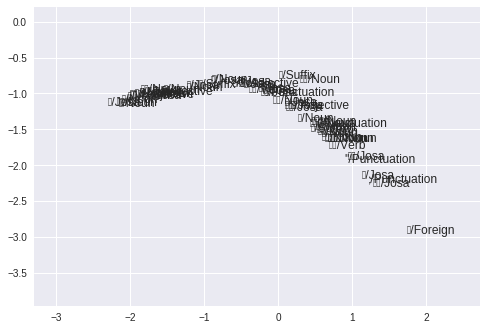

In [84]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()